In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import os, glob

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)
pd.set_option('max_colwidth',150)

# Microsoft Emotion API Data

In [2]:
def read_jsons(f, candidate):
   
    tmp_dict = {}
    
    with open(f) as json_file:    
        data = json.load(json_file)
        data = json.loads(data)
        print(data)
        try: 
            tmp_dict['age'] = data[0]['faceAttributes']['age']
            tmp_dict['gender'] = data[0]['faceAttributes']['gender']
            tmp_dict['smile'] = data[0]['faceAttributes']['smile']
            
            if data[0]['faceAttributes']['emotion']['anger'] > 0.55:
                tmp_dict['anger'] = data[0]['faceAttributes']['emotion']['anger']
                
            if data[0]['faceAttributes']['emotion']['contempt'] > 0.55:
                tmp_dict['contempt'] = data[0]['faceAttributes']['emotion']['contempt']
                
            if data[0]['faceAttributes']['emotion']['disgust'] > 0.55:
                tmp_dict['disgust'] = data[0]['faceAttributes']['emotion']['disgust']
                
            if data[0]['faceAttributes']['emotion']['fear'] > 0.55:
                tmp_dict['fear'] = data[0]['faceAttributes']['emotion']['fear']
                
            if  data[0]['faceAttributes']['emotion']['happiness'] > 0.55: 
                tmp_dict['happiness'] = data[0]['faceAttributes']['emotion']['happiness']
                
            if data[0]['faceAttributes']['emotion']['neutral'] > 0.55:
                tmp_dict['neutral'] = data[0]['faceAttributes']['emotion']['neutral']
                
            if data[0]['faceAttributes']['emotion']['sadness'] > 0.55:
                tmp_dict['sadness'] = data[0]['faceAttributes']['emotion']['sadness']
                
            if data[0]['faceAttributes']['emotion']['surprise'] > 0.55:
                tmp_dict['surprise'] = data[0]['faceAttributes']['emotion']['surprise']

            tmp_dict['face_id'] = data[0]['faceId']

            tmp_dict['image_file'] = f.split('/')[1]
    
        except (IndexError, KeyError):
            tmp_dict['age'] = "Error"
            tmp_dict['gender'] = "Error"
            tmp_dict['smile'] = "Error"
            tmp_dict['anger'] = "Error"
            tmp_dict['contempt'] = "Error"
            tmp_dict['disgust'] = "Error"
            tmp_dict['fear'] = "Error"
            tmp_dict['happiness'] = "Error"
            tmp_dict['neutral'] = "Error"
            tmp_dict['sadness'] = "Error"
            tmp_dict['surprise'] = "Error"

            tmp_dict['face_id'] = "Error"

            tmp_dict['image_file'] = f.split('/')[1]        
            
        return tmp_dict

In [3]:
basefilepath = 'MicrosoftAPI_jsons/'

def get_json(path, candidate):
    
    for f in glob.glob(path + '*.json'):
        if candidate in f:
            print(f)
            row_list.append(read_jsons(f, candidate))

In [4]:
row_list = []
get_json(basefilepath, 'hillary_clinton')
HRC_universe = pd.DataFrame(row_list)  

MicrosoftAPI_jsons/0_hillary_clinton.json
[{'faceId': '2d03a7ac-6d37-4a0a-ac12-17e5a9d38ba4', 'faceRectangle': {'top': 176, 'width': 242, 'left': 710, 'height': 242}, 'faceAttributes': {'gender': 'female', 'emotion': {'disgust': 0.0, 'contempt': 0.0, 'fear': 0.0, 'surprise': 0.0, 'anger': 0.0, 'sadness': 0.0, 'neutral': 0.0, 'happiness': 1.0}, 'smile': 1.0, 'age': 51.2}}]
MicrosoftAPI_jsons/100_hillary_clinton.json
[{'faceId': '7a2ca5d2-117f-44c0-a451-1b46ca45a14b', 'faceRectangle': {'top': 54, 'width': 73, 'left': 189, 'height': 73}, 'faceAttributes': {'gender': 'female', 'emotion': {'disgust': 0.015, 'contempt': 0.006, 'fear': 0.0, 'surprise': 0.051, 'anger': 0.005, 'sadness': 0.005, 'neutral': 0.885, 'happiness': 0.032}, 'smile': 0.032, 'age': 57.1}}]
MicrosoftAPI_jsons/101_hillary_clinton.json
[{'faceId': '165fa749-cc1c-4857-b459-ceed4c398781', 'faceRectangle': {'top': 60, 'width': 201, 'left': 108, 'height': 194}, 'faceAttributes': {'gender': 'female', 'emotion': {'disgust': 0.0, 

In [5]:
row_list = []
get_json(basefilepath, 'donald_trum')
DJT_universe = pd.DataFrame(row_list) 

MicrosoftAPI_jsons/0_donald_trump.json
[{'faceId': '3d972617-086f-4d9c-8c3a-cbf6aab5846a', 'faceRectangle': {'top': 216, 'width': 369, 'left': 440, 'height': 369}, 'faceAttributes': {'gender': 'male', 'emotion': {'disgust': 0.003, 'contempt': 0.028, 'fear': 0.0, 'surprise': 0.001, 'anger': 0.013, 'sadness': 0.043, 'neutral': 0.902, 'happiness': 0.01}, 'smile': 0.01, 'age': 63.7}}]
MicrosoftAPI_jsons/102_donald_trump.json
[]
MicrosoftAPI_jsons/10_donald_trump.json
[{'faceId': 'a4835366-a34e-49ff-a760-34f57fe4d6ab', 'faceRectangle': {'top': 44, 'width': 61, 'left': 176, 'height': 61}, 'faceAttributes': {'gender': 'male', 'emotion': {'disgust': 0.102, 'contempt': 0.009, 'fear': 0.013, 'surprise': 0.079, 'anger': 0.464, 'sadness': 0.1, 'neutral': 0.197, 'happiness': 0.036}, 'smile': 0.036, 'age': 72.3}}]
MicrosoftAPI_jsons/110_donald_trump.json
[{'faceId': '7409f622-03a7-4125-9505-366e0e3afb13', 'faceRectangle': {'top': 0, 'width': 418, 'left': 272, 'height': 418}, 'faceAttributes': {'gend

In [6]:
HRC_universe.head()

,age,anger,contempt,disgust,face_id,fear,gender,happiness,image_file,neutral,sadness,smile,surprise
0,51.2,NaN,NaN,NaN,2d03a7ac-6d37-4a0a-ac12-17e5a9d38ba4,NaN,female,1,0_hillary_clinton.json,NaN,NaN,1,NaN
1,57.1,NaN,NaN,NaN,7a2ca5d2-117f-44c0-a451-1b46ca45a14b,NaN,female,NaN,100_hillary_clinton.json,0.885,NaN,0.032,NaN
2,55.9,NaN,NaN,NaN,165fa749-cc1c-4857-b459-ceed4c398781,NaN,female,NaN,101_hillary_clinton.json,0.814,NaN,0.111,NaN
3,54.1,NaN,NaN,NaN,7dc028ce-27b3-4097-8d13-4b64188a88fb,NaN,female,1,102_hillary_clinton.json,NaN,NaN,1,NaN
4,53.5,NaN,NaN,NaN,7211bfeb-111b-4ce4-a40a-8c189011d868,NaN,female,NaN,103_hillary_clinton.json,0.968,NaN,0.006,NaN


In [7]:
HRC_universe[HRC_universe.fear == 'Error']

,age,anger,contempt,disgust,face_id,fear,gender,happiness,image_file,neutral,sadness,smile,surprise
10,Error,Error,Error,Error,Error,Error,Error,Error,109_hillary_clinton.json,Error,Error,Error,Error
46,Error,Error,Error,Error,Error,Error,Error,Error,153_hillary_clinton.json,Error,Error,Error,Error
60,Error,Error,Error,Error,Error,Error,Error,Error,169_hillary_clinton.json,Error,Error,Error,Error
61,Error,Error,Error,Error,Error,Error,Error,Error,16_hillary_clinton.json,Error,Error,Error,Error
71,Error,Error,Error,Error,Error,Error,Error,Error,182_hillary_clinton.json,Error,Error,Error,Error
72,Error,Error,Error,Error,Error,Error,Error,Error,183_hillary_clinton.json,Error,Error,Error,Error
78,Error,Error,Error,Error,Error,Error,Error,Error,194_hillary_clinton.json,Error,Error,Error,Error
86,Error,Error,Error,Error,Error,Error,Error,Error,200_hillary_clinton.json,Error,Error,Error,Error
94,Error,Error,Error,Error,Error,Error,Error,Error,214_hillary_clinton.json,Error,Error,Error,Error
96,Error,Error,Error,Error,Error,Error,Error,Error,219_hillary_clinton.json,Error,Error,Error,Error


In [8]:
DJT_universe[DJT_universe.fear == 'Error']

,age,anger,contempt,disgust,face_id,fear,gender,happiness,image_file,neutral,sadness,smile,surprise
1,Error,Error,Error,Error,Error,Error,Error,Error,102_donald_trump.json,Error,Error,Error,Error
44,Error,Error,Error,Error,Error,Error,Error,Error,16_donald_trump.json,Error,Error,Error,Error
77,Error,Error,Error,Error,Error,Error,Error,Error,221_donald_trump.json,Error,Error,Error,Error
79,Error,Error,Error,Error,Error,Error,Error,Error,223_donald_trump.json,Error,Error,Error,Error
100,Error,Error,Error,Error,Error,Error,Error,Error,254_donald_trump.json,Error,Error,Error,Error
102,Error,Error,Error,Error,Error,Error,Error,Error,25_donald_trump.json,Error,Error,Error,Error
106,Error,Error,Error,Error,Error,Error,Error,Error,266_donald_trump.json,Error,Error,Error,Error
141,Error,Error,Error,Error,Error,Error,Error,Error,327_donald_trump.json,Error,Error,Error,Error
155,Error,Error,Error,Error,Error,Error,Error,Error,363_donald_trump.json,Error,Error,Error,Error
156,Error,Error,Error,Error,Error,Error,Error,Error,365_donald_trump.json,Error,Error,Error,Error


## Examination of the images that triggered an error revealed that errors were caused by the API being unable to calculate an emotion due to the face being partially obscured or being in profile.

#### Remove all rows with Errors

In [9]:
HRC_universe = HRC_universe[HRC_universe.fear != 'Error']

In [10]:
DJT_universe = DJT_universe[DJT_universe.fear != 'Error']

In [11]:
num_cols = ['age', 'anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'smile', 'surprise']

In [12]:
HRC_universe[num_cols] = HRC_universe[num_cols].apply(pd.to_numeric)
DJT_universe[num_cols] = DJT_universe[num_cols].apply(pd.to_numeric)

In [13]:
sentiment_cols = ['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']

In [14]:
HRC_universe_sentiment = HRC_universe[sentiment_cols]
DJT_universe_sentiment = DJT_universe[sentiment_cols]
HRC_universe_sentiment.head()

,anger,contempt,disgust,fear,happiness,neutral,sadness,surprise
0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,0.885,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,0.814,NaN,NaN
3,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,0.968,NaN,NaN


## Visualising sentiment scores

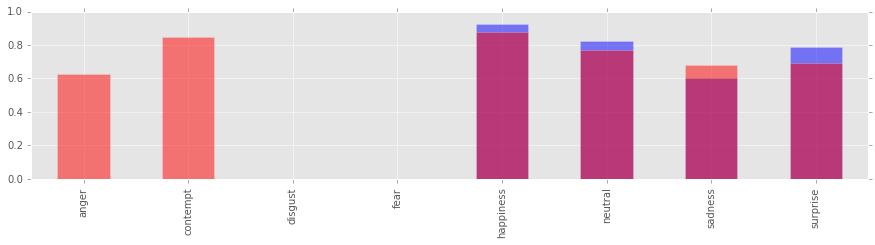

In [15]:
HRC_universe_sentiment.mean().plot(kind='bar', ylim=(0,1), color='blue', alpha=.5)
DJT_universe_sentiment.mean().plot(kind='bar',ylim=(0,1), color='red', alpha=.5)

In [16]:
print("anger: ", len(HRC_universe_sentiment[HRC_universe_sentiment.anger >= 0.55]))
print("contempt: ", len(HRC_universe_sentiment[HRC_universe_sentiment.contempt >= 0.55]))
print("disgust: ", len(HRC_universe_sentiment[HRC_universe_sentiment.disgust >= 0.55]))
print("fear: ", len(HRC_universe_sentiment[HRC_universe_sentiment.fear >= 0.55]))
print("happiness: ", len(HRC_universe_sentiment[HRC_universe_sentiment.happiness >= 0.55]))
print("neutral: ", len(HRC_universe_sentiment[HRC_universe_sentiment.neutral >= 0.55]))
print("sadness: ", len(HRC_universe_sentiment[HRC_universe_sentiment.sadness >= 0.55]))
print("surprise: ", len(HRC_universe_sentiment[HRC_universe_sentiment.surprise >= 0.55]))

anger:  0
contempt:  0
disgust:  0
fear:  0
happiness:  94
neutral:  178
sadness:  3
surprise:  6


In [17]:
print("anger: ", len(DJT_universe_sentiment[DJT_universe_sentiment.anger >= 0.55]))
print("contempt: ", len(DJT_universe_sentiment[DJT_universe_sentiment.contempt >= 0.55]))
print("disgust: ", len(DJT_universe_sentiment[DJT_universe_sentiment.disgust >= 0.55]))
print("fear: ", len(DJT_universe_sentiment[DJT_universe_sentiment.fear >= 0.55]))
print("happiness: ", len(DJT_universe_sentiment[DJT_universe_sentiment.happiness >= 0.55]))
print("neutral: ", len(DJT_universe_sentiment[DJT_universe_sentiment.neutral >= 0.55]))
print("sadness: ", len(DJT_universe_sentiment[DJT_universe_sentiment.sadness >= 0.55]))
print("surprise: ", len(DJT_universe_sentiment[DJT_universe_sentiment.surprise >= 0.55]))

anger:  6
contempt:  1
disgust:  0
fear:  0
happiness:  29
neutral:  139
sadness:  11
surprise:  4


# Age

In [18]:
HRC_universe.age.mean()

52.684049079754615

In [19]:
DJT_universe.age.mean()

67.23709090909091